## Net Guardian

## Network Anomaly Detection

* Net Guardian is a machine learning project focused on spotting odd activities in network traffic
for better cybersecurity. Using smart algorithms like Decision trees and Random forests, we learn
from network data to tell apart normal actions from possible threats, like hacks or unusual access
attempts.

### DWDM Lab Project

### Team :
* Ishan Chaturvedi --- 210911312
* Meda Bharat Reddy   ---     210911308
* Dhruv Negi       ---  210911314

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Few necessary imports for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing / Reading the training and testing data

train_data = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')

test_data = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [4]:
# Training dataset

train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# Testing data

test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [6]:
train_data.shape, test_data.shape

((82332, 45), (175341, 45))

* Checking for Null / Missing values in data

In [7]:
train_data.isnull().sum().sum(), test_data.isnull().sum().sum()

(0, 0)

* The data has no Missing / Null values

* Thus we can continue with model building .

### Pre-processing the data

In [8]:
cols = train_data.columns

cols

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [9]:
df = pd.concat([train_data, test_data])
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [10]:
df.shape

(257673, 45)

* One Hot Encoding the Categorical Variables

In [11]:
object_cols = df.select_dtypes(include = "object").columns

int_cols = df.select_dtypes(include = "int64").columns

float_cols = df.select_dtypes(include = "float64").columns

In [14]:
print("Object columns :")
for i in object_cols:
    print(i, end = "  ")

df = df.drop(object_cols, axis = 1)

Object columns :
proto  service  state  attack_cat  

### Checking the metrics for 30% test data

In [18]:
# Imports necessary for model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


x = df.drop('label', axis = 1)
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
accuracy_30 = []

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes' :GaussianNB(),
}


for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_test, y_test)
   accuracy_30.append(scores)
   print(f"Model : {model} , Acuuracy : {scores * 100:.2f} %")


for name, model in models.items():
   model.fit(x_train, y_train)
   y_preds = model.predict(x_test)
   print(f"Classification Report for {model}\n")
   print(classification_report(y_test, y_preds))

Model : LogisticRegression() , Acuuracy : 80.90 %
Model : DecisionTreeClassifier() , Acuuracy : 98.14 %
Model : RandomForestClassifier() , Acuuracy : 98.23 %
Model : GaussianNB() , Acuuracy : 78.48 %
Classification Report for LogisticRegression()

              precision    recall  f1-score   support

           0       0.85      0.57      0.68     28044
           1       0.79      0.94      0.86     49258

    accuracy                           0.81     77302
   macro avg       0.82      0.76      0.77     77302
weighted avg       0.82      0.81      0.80     77302

Classification Report for DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     28044
           1       0.99      0.98      0.99     49258

    accuracy                           0.98     77302
   macro avg       0.98      0.98      0.98     77302
weighted avg       0.98      0.98      0.98     77302

Classification Report for RandomForestClassifi

### Checking the metrics for 50% test data

In [19]:
# Imports necessary for model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


x = df.drop('label', axis = 1)
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
accuracy_50 = []

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes' :GaussianNB(),
}


for name, model in models.items():
   model.fit(x_train, y_train)
   scores = model.score(x_test, y_test)
   accuracy_50.append(scores)
   print(f"Model : {model} , Acuuracy : {scores * 100:.2f} %")


for name, model in models.items():
   model.fit(x_train, y_train)
   y_preds = model.predict(x_test)
   print(f"Classification Report for {model}\n")
   print(classification_report(y_test, y_preds))

Model : LogisticRegression() , Acuuracy : 81.04 %
Model : DecisionTreeClassifier() , Acuuracy : 97.97 %
Model : RandomForestClassifier() , Acuuracy : 98.05 %
Model : GaussianNB() , Acuuracy : 78.89 %
Classification Report for LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.57      0.68     46504
           1       0.80      0.95      0.86     82333

    accuracy                           0.81    128837
   macro avg       0.83      0.76      0.77    128837
weighted avg       0.82      0.81      0.80    128837

Classification Report for DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     46504
           1       0.98      0.98      0.98     82333

    accuracy                           0.98    128837
   macro avg       0.98      0.98      0.98    128837
weighted avg       0.98      0.98      0.98    128837

Classification Report for RandomForestClassifi

### Comparison of Results

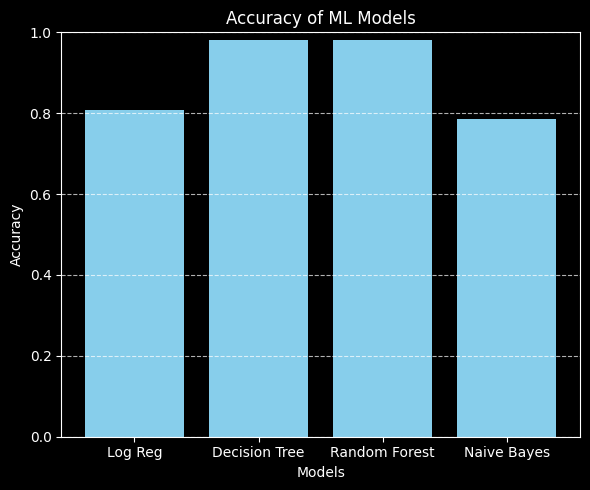

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

def plot_model_accuracies(models, accuracies):
    plt.figure(figsize=(6, 5))  # Set the figure size
    plt.bar(models, accuracies, color='skyblue')  # Plotting the bar chart
    plt.xlabel('Models')  # Label for the x-axis
    plt.ylabel('Accuracy')  # Label for the y-axis
    plt.title('Accuracy of ML Models')  # Title for the plot
    # plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1 (assuming accuracy ranges from 0 to 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


model_names = ['Log Reg', 'Decision Tree', 'Random Forest', 'Naive Bayes']
condition_labels = ['30%', '50%']

plot_model_accuracies(model_names, accuracy_30)

### Comparison based on test splitting

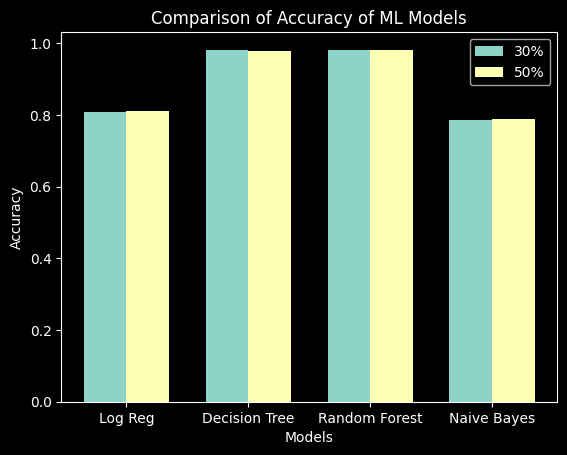

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
def plot_accuracy(models, condition1_accuracy, condition2_accuracy, condition_labels):
    n = len(models)  # Number of models

    ind = np.arange(n)  # the x locations for the groups
    width = 0.35        # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind - width/2, condition1_accuracy, width, label=condition_labels[0])
    rects2 = ax.bar(ind + width/2, condition2_accuracy, width, label=condition_labels[1])

    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Comparison of Accuracy of ML Models')
    ax.set_xticks(ind)
    ax.set_xticklabels(models)
    ax.legend()
    plt.show()


model_names = ['Log Reg', 'Decision Tree', 'Random Forest', 'Naive Bayes']
condition_labels = ['30%', '50%']

plot_accuracy(model_names, accuracy_30, accuracy_50, condition_labels)